In [1]:
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is the default camera

if not cap.isOpened():
    print("Error: Could not open video device.")
else:
    # Capture a single frame
    status, photo = cap.read()

    if status:
        # Display the captured frame
        cv2.imshow('My photo', photo)
        # Wait for a key press to close the window
        cv2.waitKey(0)
    else:
        print("Error: Could not read frame from video device.")

    # Release the video capture object
    cap.release()
    # Destroy all OpenCV windows
    cv2.destroyAllWindows()

__Task - 1:__

    Crop the photo and paste the same photo in the photo that is clicked earlier.

In [18]:
import cv2

cap = cv2.VideoCapture(0) 

status, photo = cap.read()

if status:
    
    # Define the region to crop (row_start, row_end, col_start, col_end)
    r_start, r_end, c_start, c_end = 75, 175, 75, 175  # Example values, change as needed
    cropped_photo = photo[r_start:r_end, c_start:c_end]
    
    # Define the position to paste the cropped region back (top-left corner)
    paste_r, paste_c = 10, 30  # Example values, change as needed
    
    # Ensure the paste region is within the bounds of the original photo
    photo_height, photo_width = photo.shape[:2]
    crop_height, crop_width = cropped_photo.shape[:2]
    
    if paste_r + crop_height <= photo_height and paste_c + crop_width <= photo_width:
        photo[paste_r:paste_r+crop_height, paste_c:paste_c+crop_width] = cropped_photo
    else:
        print("Error: Paste position is out of bounds.")
    
    # Display the resulting image
    cv2.imshow('My photo', photo)
    cv2.waitKey(0)  # Wait indefinitely until a key is pressed
    cv2.destroyAllWindows()  # Close all OpenCV windows

# Release the camera capture object
cap.release()


In [12]:
photo.shape[:2]

(480, 640)

__Task - 2:__

    Click 2 photos and place the 2nd photo in the 1st photo somewhere in the top left
    corner.

In [10]:
import cv2
from PIL import Image
import numpy as np

def capture_images():
    # Initialize the camera
    cap = cv2.VideoCapture(0)

    # Capture the image
    ret, frame = cap.read()

    # Release the camera
    cap.release()

    # Return the captured frame
    return frame

def merge_images(image1, image2, output_path):
    # Convert OpenCV images to PIL images
    img1 = Image.fromarray(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    img2 = Image.fromarray(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

    # Resize second image to fit within the top-left corner of the first image
    width, height = img1.size
    img2 = img2.resize((width // 4, height // 4))  # Adjust the scaling as needed

    # Paste the second image onto the first image
    img1.paste(img2, (0, 0))  # Top-left corner

    # Save the result
    img1.save(output_path)

if __name__ == "__main__":
    # Capture images
    image1 = capture_images()
    image2 = capture_images()

    # Paths to output
    output_path = "merged_image.jpg"

    # Merge images
    merge_images(image1, image2, output_path)


__Task - 3:__

    Download a sunglass photo and overlay on the main photo as filter through python

In [35]:
import cv2
import numpy as np

def overlay_sunglasses(main_photo, sunglass_photo, position):
    # Check if main photo is loaded properly
    if main_photo is None:
        print("Error: Main photo could not be loaded.")
        return None

    # Check if sunglass photo is loaded properly
    if sunglass_photo is None:
        print("Error: Sunglass photo could not be loaded.")
        return main_photo

    # Resize sunglass photo to fit the main photo
    sunglass_resized = cv2.resize(sunglass_photo, (160, 80))  # Adjust dimensions as needed

    # Check if sunglass photo has an alpha channel
    if sunglass_resized.shape[2] == 4:
        alpha_sunglasses = sunglass_resized[:, :, 3]
    else:
        alpha_sunglasses = np.ones_like(sunglass_resized[:, :, 0]) * 255

    # Extract region of interest (ROI) from the main photo
    roi = main_photo[position[1]:position[1]+sunglass_resized.shape[0], 
                     position[0]:position[0]+sunglass_resized.shape[1]]

    # Extract alpha channel from ROI
    alpha_roi = np.ones_like(roi[:, :, 0]) * 255

    # Perform alpha blending
    alpha_combined = np.minimum(alpha_roi, alpha_sunglasses)
    for c in range(0, 3):
        roi[:, :, c] = (sunglass_resized[:, :, c] * (alpha_sunglasses / 255.0) +
                        roi[:, :, c] * (1.0 - alpha_sunglasses / 255.0))

    # Update ROI in the main photo
    main_photo[position[1]:position[1]+sunglass_resized.shape[0], 
               position[0]:position[0]+sunglass_resized.shape[1]] = roi

    return main_photo

# Load the main photo
main_photo = cv2.imread('boy_cartoon.jpg')

# Check if main photo is loaded properly
if main_photo is None:
    print("Error: Main photo could not be loaded.")
else:
    # Load the sunglass photo with transparent background
    sunglass_photo = cv2.imread('sunglass.png', cv2.IMREAD_UNCHANGED)

    # Define the position to overlay the sunglasses
    position = (420, 220)  # Adjust the position as needed

    # Apply the sunglasses filter
    result_photo = overlay_sunglasses(main_photo, sunglass_photo, position)

    # Display the result
    if result_photo is not None:
        cv2.imshow('Result', result_photo)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Save the result
        cv2.imwrite('result_photo.jpg', result_photo)


__Task - 4:__

    Make your own Numpy array (50 * 50) and output should look like photo through python.

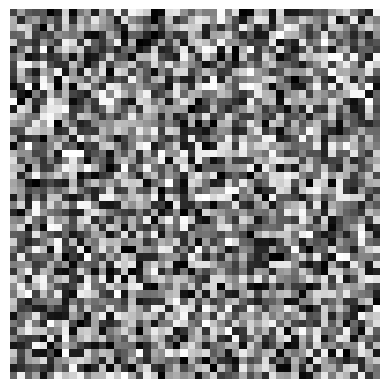

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 50x50 NumPy array with random values between 0 and 255 (representing grayscale pixel values)
array = np.random.randint(0, 256, size=(50, 50))

# Display the array as an image
plt.imshow(array, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

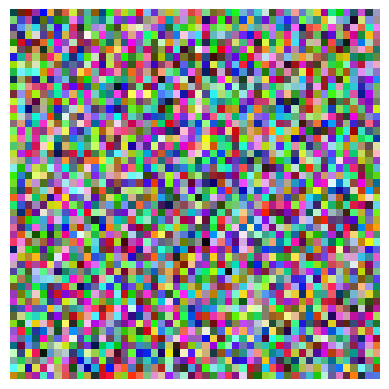

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random RGB values for each pixel in the image
rgb_image = np.random.randint(0, 256, size=(50, 50, 3), dtype=np.uint8)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')
plt.show()